In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
pwd = os.getcwd()

In [29]:
df = pd.read_csv(pwd + "\\score.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [32]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

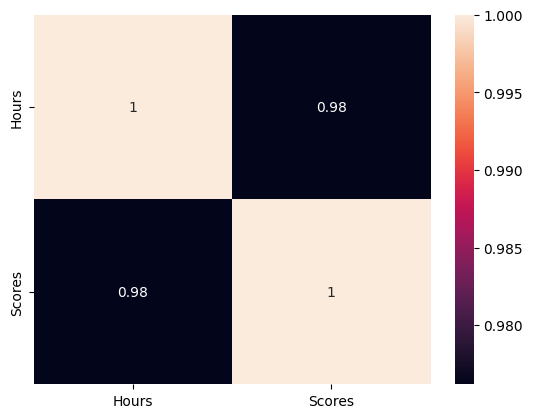

In [33]:
sns.heatmap(df.corr(), annot=True)

<module 'matplotlib.pyplot' from 'c:\\Users\\Indra Kusuma\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

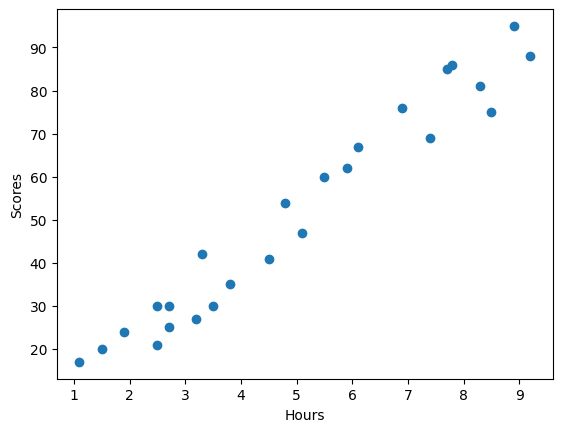

In [52]:
plt.scatter(df['Hours'], df['Scores'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt

In [35]:
input_data = df.drop(columns= ['Scores'], axis = 1, inplace = False)
target_data = df.drop(columns= ['Hours'], axis = 1, inplace = False)

In [37]:
train_inputs, test_inputs, train_targets, test_targets = train_test_split (input_data, target_data, test_size = 0.2, random_state=42)

In [38]:
train_inputs

,Hours
9,2.7
13,3.3
1,5.1
22,3.8
5,1.5
2,3.2
12,4.5
15,8.9
3,8.5
4,3.5


In [40]:
train_targets

,Scores
9,25
13,42
1,47
22,35
5,20
2,27
12,41
15,95
3,75
4,30


In [41]:
model = LinearRegression()

In [43]:
model.fit(train_inputs, train_targets)

LinearRegression()

In [44]:
print("Coeficcient : ", model.coef_)
print("Intercept :", model.intercept_)

Coeficcient :  [[9.68207815]]
Intercept : [2.82689235]


In [46]:
train_predictions = model.predict(train_inputs)
train_predictions

array([[28.96850337],
       [34.77775026],
       [52.20549094],
       [39.61878934],
       [17.35000959],
       [33.80954245],
       [46.39624405],
       [88.99738793],
       [85.12455667],
       [36.71416589],
       [28.96850337],
       [21.22284085],
       [49.3008675 ],
       [61.8875691 ],
       [78.34710196],
       [56.0783222 ],
       [77.37889414],
       [13.47717832],
       [74.4742707 ],
       [91.90201137]])

Text(0, 0.5, 'Predicted Scores')

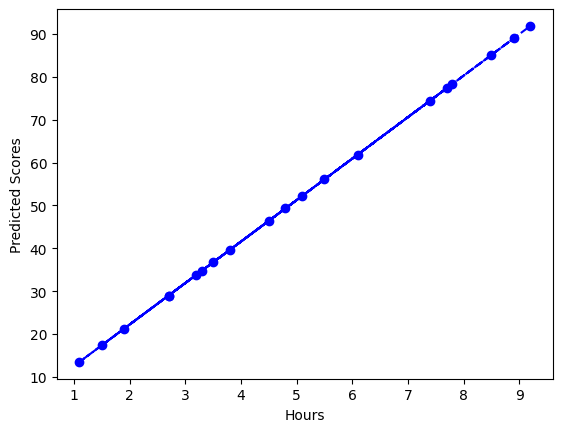

In [56]:
plt.plot(train_inputs, train_predictions, 'bo--')
plt.xlabel('Hours')
plt.ylabel('Predicted Scores')

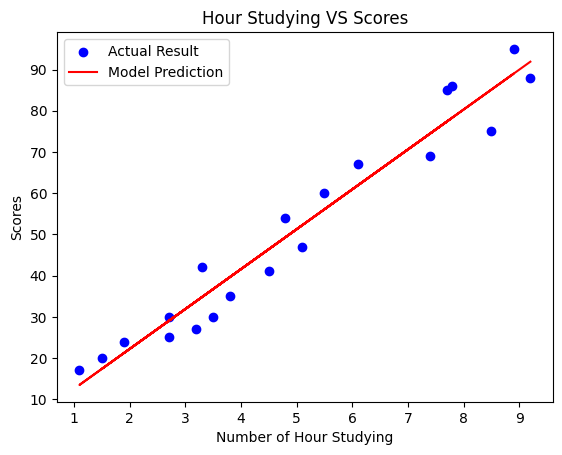

In [58]:
plt.scatter(train_inputs, train_targets, color='blue')
plt.plot(train_inputs, train_predictions,color='red')
plt.xlabel("Number of Hour Studying")
plt.ylabel("Scores")
plt.title("Hour Studying VS Scores")
plt.legend(['Actual Result','Model Prediction']);

In [62]:
score = model.score(train_inputs, train_targets)
print("Model Accuracy", round(score * 100, 2), " %")
print("RMSE : ", round(np.sqrt(mean_squared_error(train_targets, train_predictions)), 2))

Model Accuracy 94.91  %
RMSE :  49.65


In [63]:
test_predictions = model.predict(test_inputs)

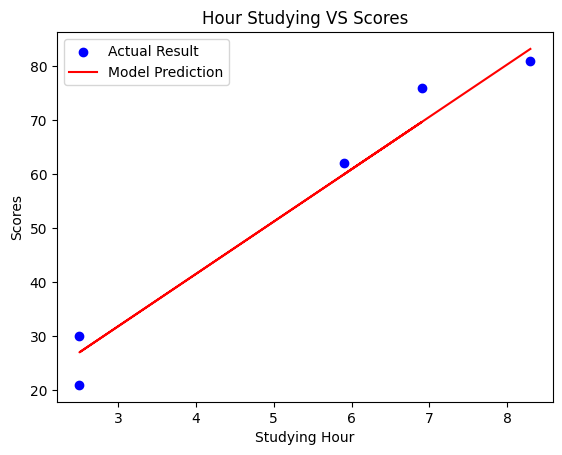

In [64]:
plt.scatter(test_inputs, test_targets, color='blue')
plt.plot(test_inputs, test_predictions, color='red')
plt.xlabel("Studying Hour")
plt.ylabel("Scores")
plt.title("Hour Studying VS Scores")
plt.legend(['Actual Result','Model Prediction'])

In [67]:
score = model.score(test_inputs, test_targets)
print("Accuracy: ", round(score*100, 2), " %")
print("RMSE:     ",round(np.sqrt(mean_squared_error(test_targets,test_predictions)), 2))

Accuracy:  96.78  %
RMSE:      4.35


In [70]:
print("Score if studying 2 hours per day: " , model.predict([[2]]))

print("Score if studying 6 hours per day: " , model.predict([[6]]))

print("Score if studying 9 hours per day: " , model.predict([[9]]))



Score if studying 2 hours per day:  [[22.19104866]]
Score if studying 6 hours per day:  [[60.91936128]]
Score if studying 9 hours per day:  [[89.96559574]]


c:\Users\Indra Kusuma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Indra Kusuma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Indra Kusuma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
